In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


This dataset is designed for research and analysis of load balancing in distributed systems. It includes key features such as task size, CPU and memory demand, network latency, I/O operations, disk usage, number of connections, and priority level, along with a target variable for classification or optimization. Timestamp data is also provided for temporal analysis. It is suitable for machine learning, simulation studies, and performance optimization research. <br>

**Columns:** <br>
**task_size:** Size of the task (numeric). <br>
**cpu_demand:** CPU demand of the task (numeric). <br>
**memory_demand:** Memory demand of the task (numeric). <br>
**network_latency:** Network latency associated with the task (numeric). <br>
**io_operations:** Number of I/O operations (numeric). <br>
**disk_usage:** Disk usage for the task (numeric). <br>
**num_connections:** Number of active connections for the task (numeric). <br>
**priority_level:** Priority level assigned to the task (numeric). <br>
**target:**Target label indicating the outcome or category (binary). <br>
**timestamp:** Timestamp when the task data was recorded. <br>

In [ ]:
##!pip install bayesian-optimization

In [ ]:
###!pip install keras-tuner

In [ ]:
##!pip uninstall tensorflow
##!pip install tensorflow==2.12.0

In [ ]:

##!pip install keras==2.12.0

In [ ]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from math import floor
from sklearn.metrics import make_scorer, accuracy_score
from bayes_opt import BayesianOptimization
from sklearn.model_selection import StratifiedKFold
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

In [ ]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [ ]:
# Importing all datasets
LoadBalancerSystem = pd.read_csv("/content/Load Balancing Improved.csv")
LoadBalancerSystem.head(4)

,task_size,cpu_demand,memory_demand,network_latency,io_operations,disk_usage,num_connections,priority_level,target,timestamp
0,-0.152124,3.750160,-0.981182,0.251507,-0.471993,1.007026,0.313790,3.050953,1,2023-03-16 03:46:22
1,0.724624,-3.978920,2.022732,1.194530,-0.010304,-2.493867,-0.073875,-1.271258,0,2023-09-02 20:15:54
2,4.650228,1.145925,2.641659,-1.899635,1.187132,4.283652,0.572666,1.243801,1,2022-02-19 08:48:52
3,-0.138208,-0.189687,-0.820848,-3.060794,-1.982086,3.620598,-0.876702,0.776770,1,2023-12-22 11:58:26


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, test = train_test_split(LoadBalancerSystem, test_size=0.2, random_state=1)

In [ ]:
print(train.shape, test.shape)

(8542, 10) (2136, 10)


In [ ]:
print("The columns in train data :", train.columns)
print("The columns in test data :", test.columns)

The columns in train data : Index(['task_size', 'cpu_demand', 'memory_demand', 'network_latency',
       'io_operations', 'disk_usage', 'num_connections', 'priority_level',
       'target', 'timestamp'],
      dtype='object')
The columns in test data : Index(['task_size', 'cpu_demand', 'memory_demand', 'network_latency',
       'io_operations', 'disk_usage', 'num_connections', 'priority_level',
       'target', 'timestamp'],
      dtype='object')


In [ ]:
train.to_csv("train_load_balancer.csv")

In [ ]:
test.to_csv("test_load_balancer.csv")

In [ ]:
# Importing all datasets
train = pd.read_csv("/content/train_load_balancer.csv")
train.head(4)

,Unnamed: 0,task_size,cpu_demand,memory_demand,network_latency,io_operations,disk_usage,num_connections,priority_level,target,timestamp
0,4311,-2.884349,-0.304593,1.428882,0.641865,-1.265519,-2.042585,-2.151759,2.248828,0,2024-04-30 12:47:38
1,6133,0.163591,-0.054587,0.243658,0.631062,-2.349176,-0.106621,0.016042,2.954929,0,2024-09-15 11:42:34
2,2321,1.243694,3.099626,0.301481,0.439303,-3.356344,4.851570,-1.382724,2.085178,1,2022-10-20 08:26:25
3,1595,-1.675813,0.516609,-1.972764,1.926940,-1.554229,-2.546848,1.107627,1.629831,1,2023-10-08 10:31:30


In [ ]:
# Importing all datasets
test = pd.read_csv("/content/test_load_balancer.csv")
test.head(4)

,Unnamed: 0,task_size,cpu_demand,memory_demand,network_latency,io_operations,disk_usage,num_connections,priority_level,target,timestamp
0,6138,0.982596,2.560753,0.309671,0.484964,-2.768847,4.956329,0.780822,0.050808,1,2024-09-22 00:03:32
1,9271,-0.291851,1.488813,1.230143,1.814476,-2.828979,2.481521,-0.649220,0.193506,1,2022-04-04 12:13:28
2,4052,0.371047,-0.104333,2.951606,-0.270315,0.201554,1.474998,0.502292,-0.247073,1,2024-07-19 04:29:14
3,3068,-0.619218,-0.772362,0.013539,-1.840224,-1.292816,3.058381,2.911729,-1.782623,0,2022-08-18 00:11:56


In [ ]:
###! pip install klib

In [ ]:
import klib

GridSpec(6, 1)

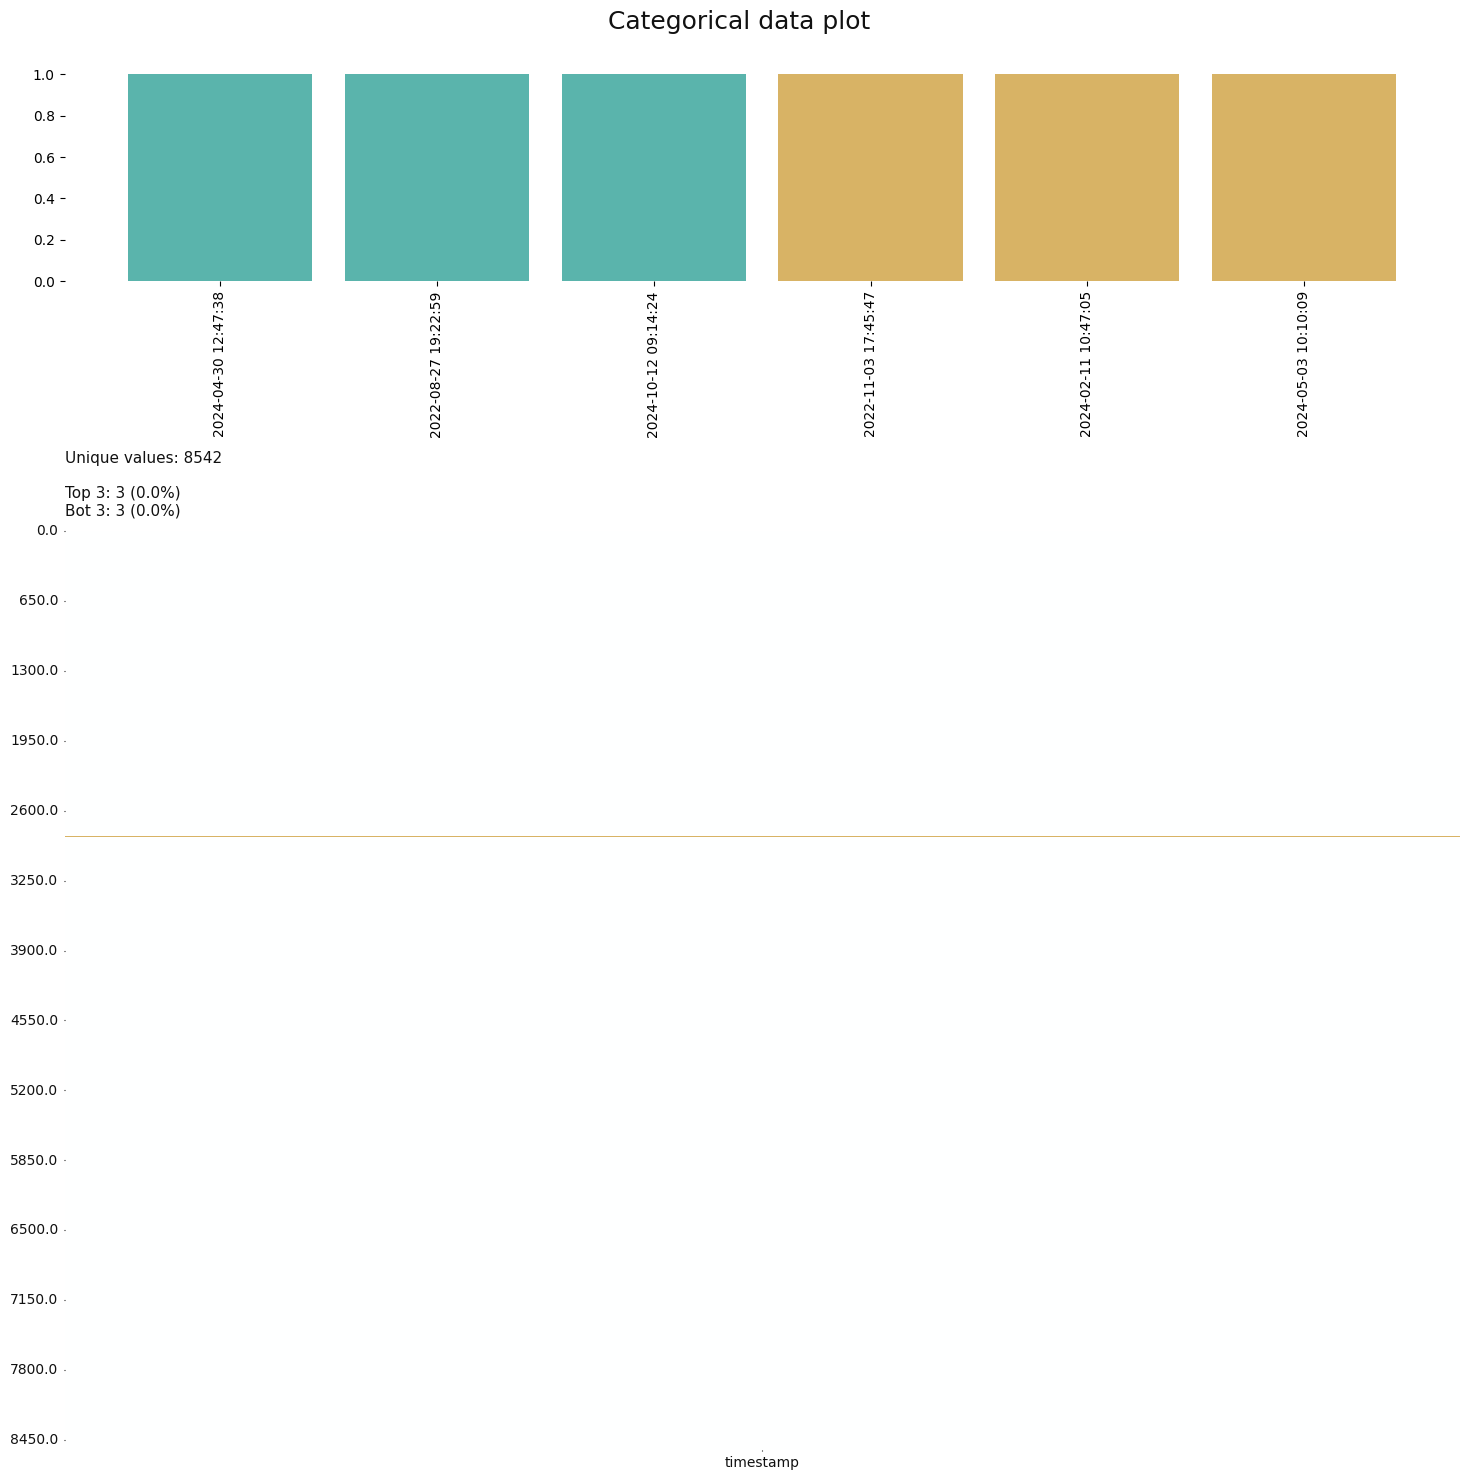

In [ ]:
klib.cat_plot(train)

In [ ]:
klib.corr_mat(train)

,Unnamed: 0,task_size,cpu_demand,memory_demand,network_latency,io_operations,disk_usage,num_connections,priority_level,target
Unnamed: 0,1.00,0.01,0.00,0.02,0.02,-0.00,-0.00,-0.01,0.01,0.01
task_size,0.01,1.00,0.41,0.41,-0.25,0.01,0.69,0.01,0.04,0.30
cpu_demand,0.00,0.41,1.00,-0.02,0.01,-0.20,0.54,0.01,0.32,0.62
memory_demand,0.02,0.41,-0.02,1.00,0.06,-0.05,0.24,0.02,0.24,-0.01
network_latency,0.02,-0.25,0.01,0.06,1.00,-0.10,-0.59,-0.02,0.23,0.00
io_operations,-0.00,0.01,-0.20,-0.05,-0.10,1.00,-0.35,-0.01,-0.23,0.00
disk_usage,-0.00,0.69,0.54,0.24,-0.59,-0.35,1.00,0.03,-0.17,0.27
num_connections,-0.01,0.01,0.01,0.02,-0.02,-0.01,0.03,1.00,-0.01,0.01
priority_level,0.01,0.04,0.32,0.24,0.23,-0.23,-0.17,-0.01,1.00,0.30
target,0.01,0.30,0.62,-0.01,0.00,0.00,0.27,0.01,0.30,1.00


<Axes: title={'center': 'Feature-correlation (pearson)'}>

<Figure size 1500x800 with 0 Axes>

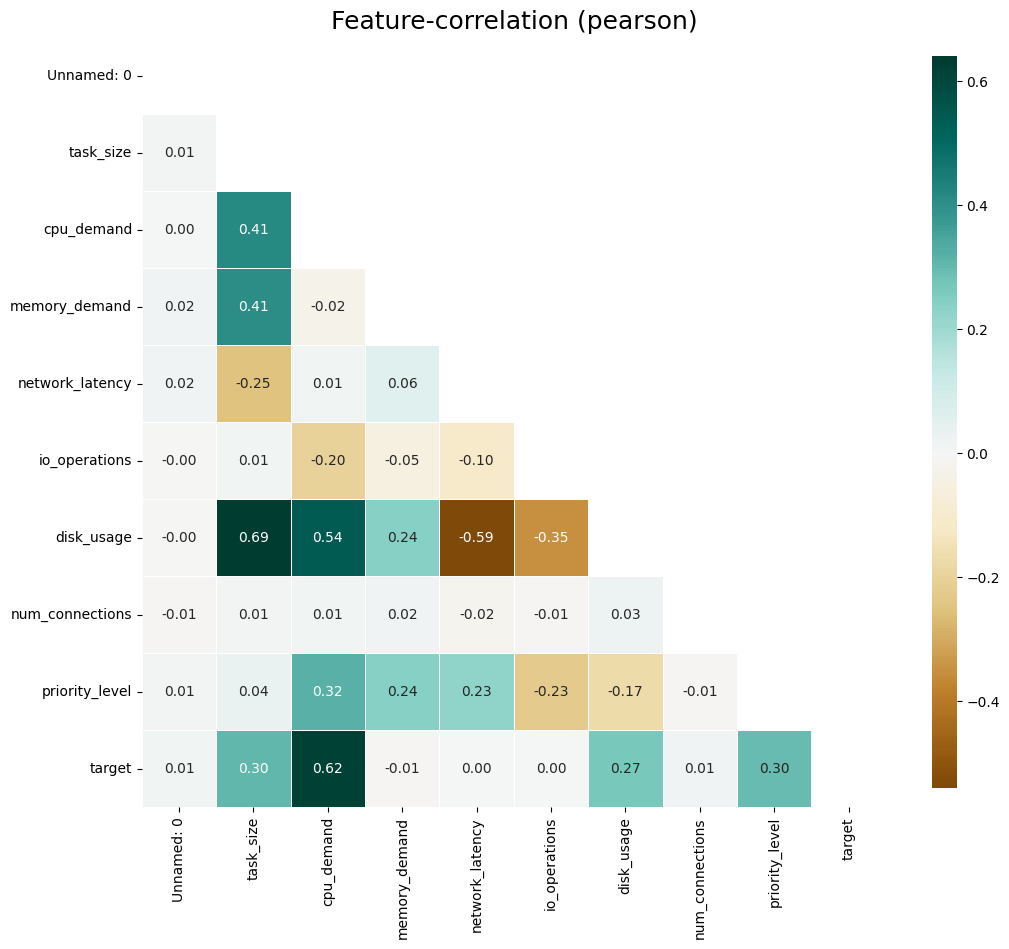

In [ ]:
plt.figure(figsize=[15,8])
klib.corr_plot(train)

In [ ]:
klib.missingval_plot(train)

No missing values found in the dataset.


In [ ]:
train = klib.data_cleaning(train)
test = klib.data_cleaning(test)

Shape of cleaned data: (8542, 11) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.37 MB (-51.39%)

Shape of cleaned data: (2136, 11) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.09 MB (-50.0%)



In [ ]:
train_cleaned = klib.clean_column_names(train)
test_cleaned = klib.clean_column_names(test)

In [ ]:
train_cleaned = klib.convert_datatypes(train_cleaned)
test_cleaned = klib.convert_datatypes(test_cleaned)

Displaying positive correlations. Specify a positive "threshold" to limit the results further.


<Axes: title={'center': 'Feature-correlation (pearson)'}>

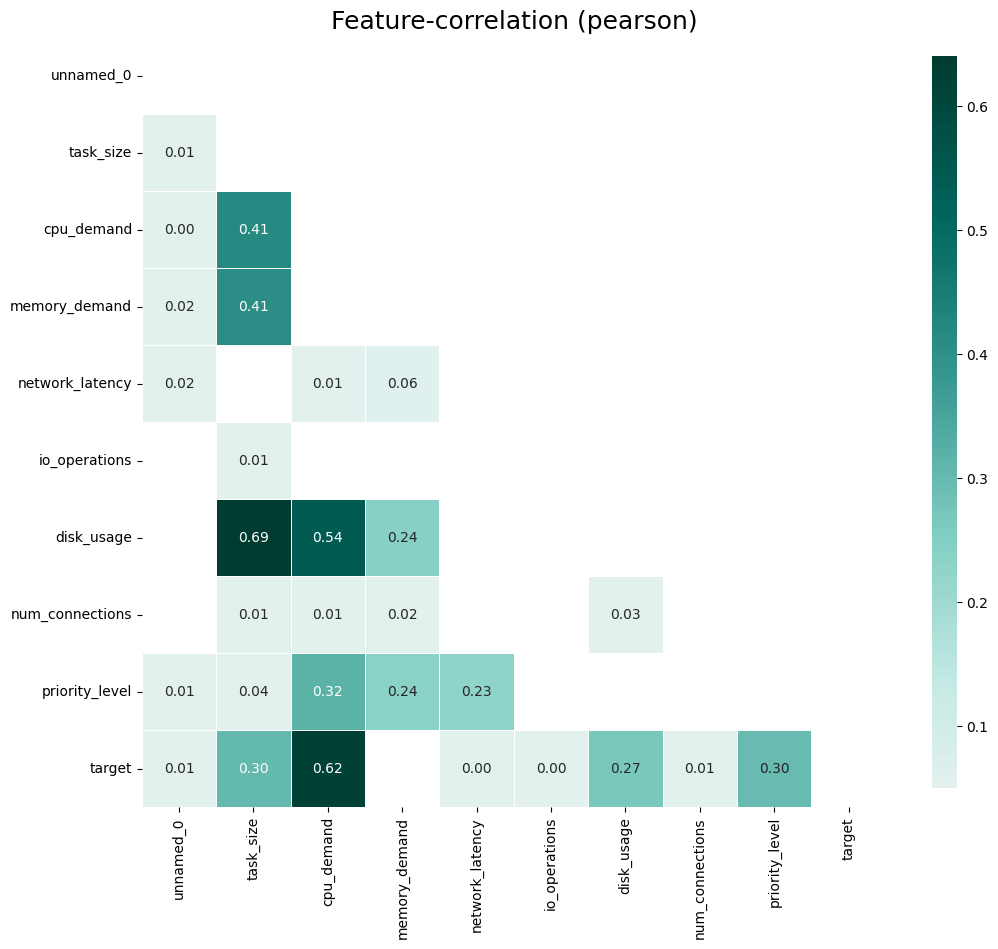

In [ ]:
klib.corr_plot(train_cleaned, split='pos')

<Axes: xlabel='priority_level', ylabel='Density'>

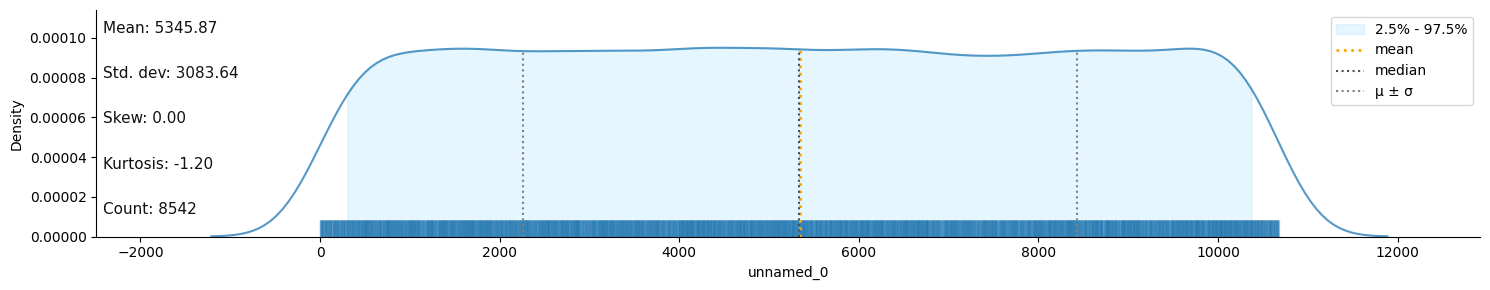

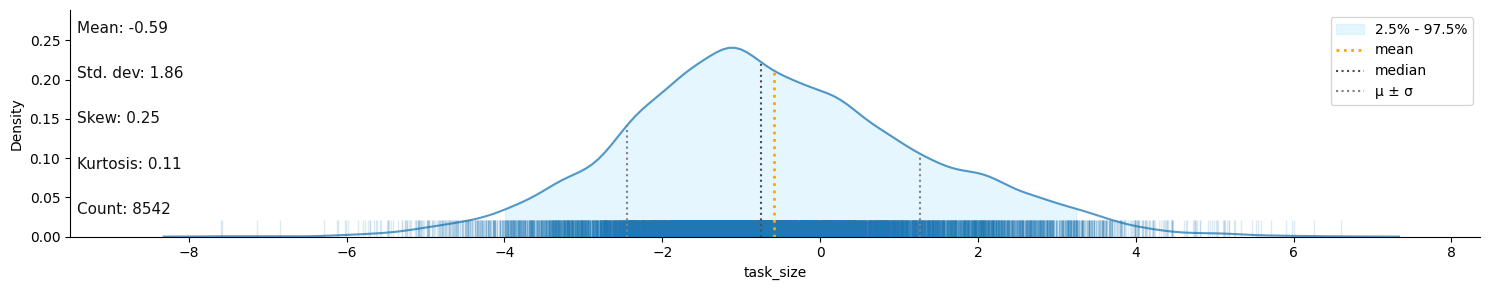

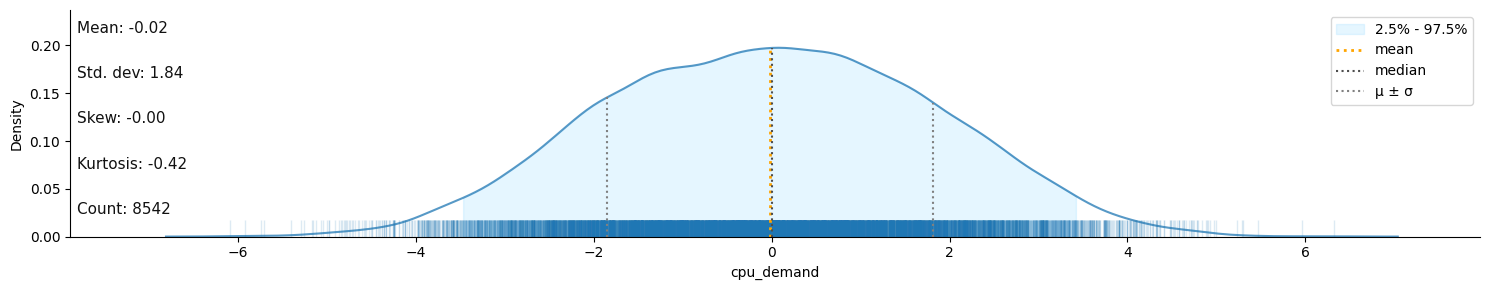

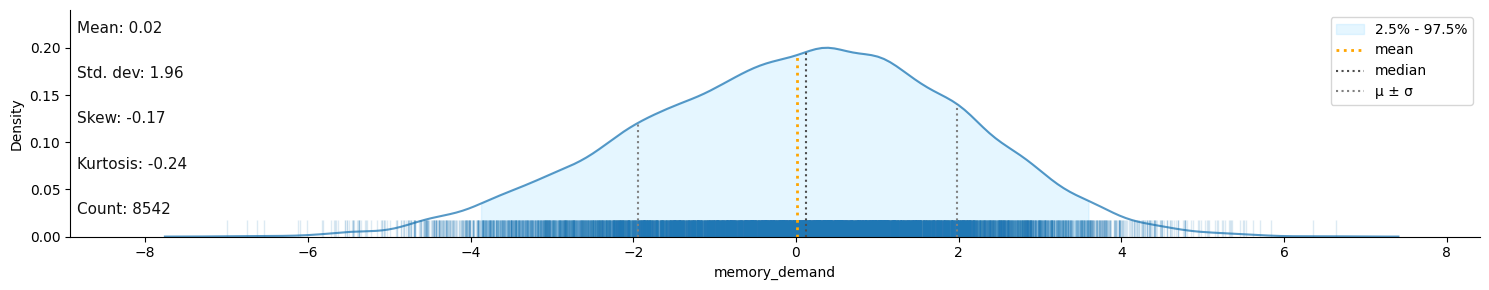

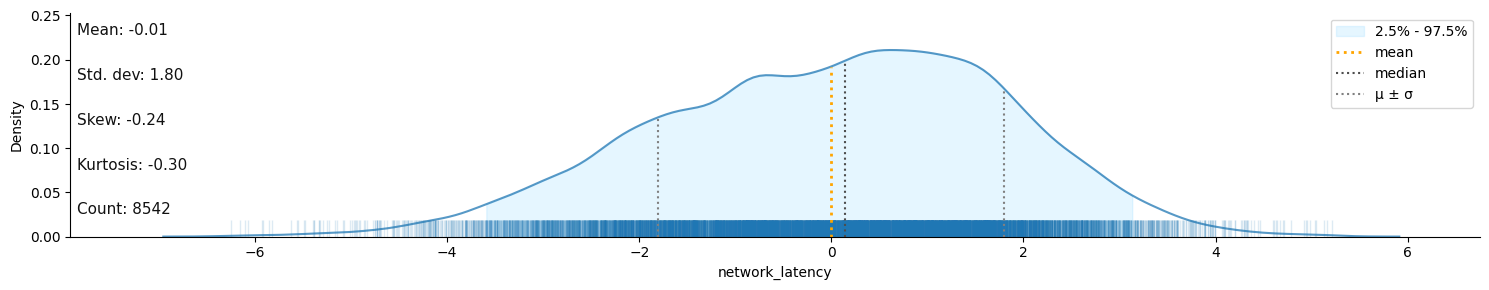

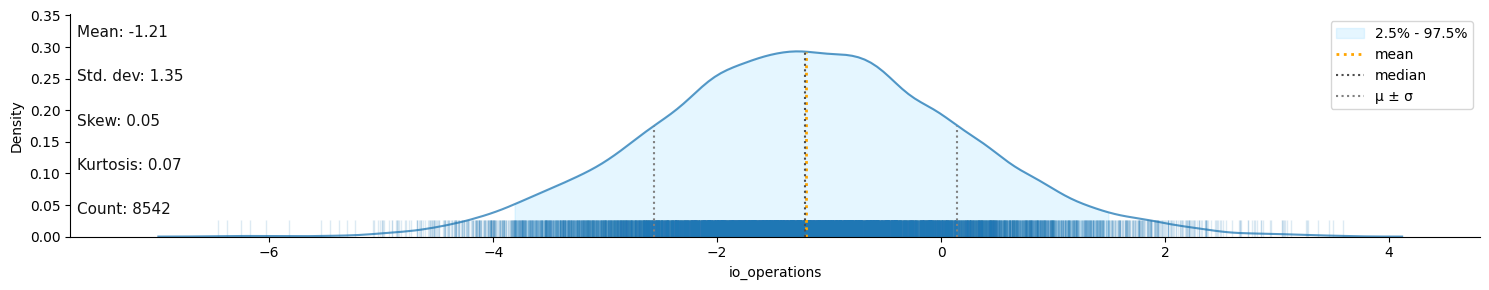

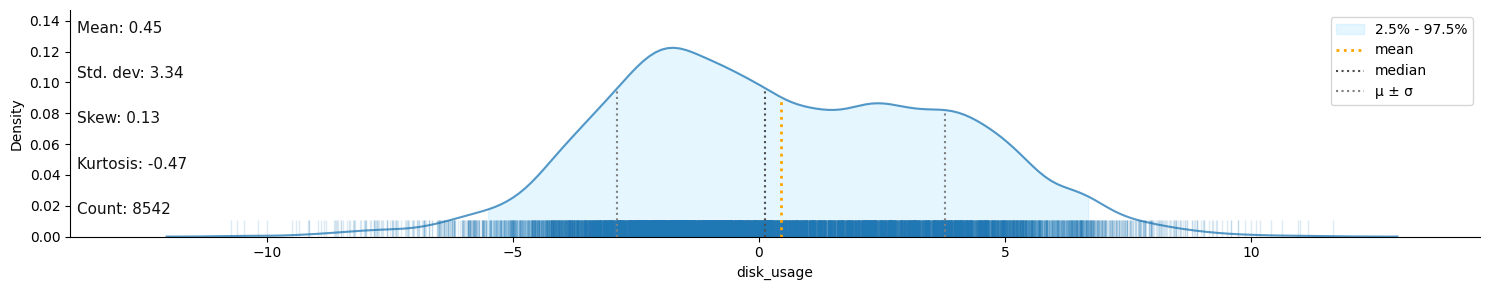

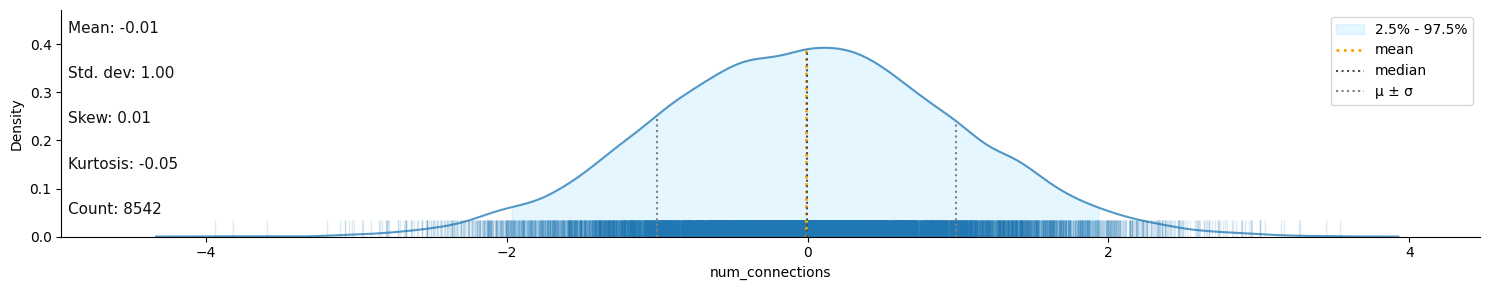

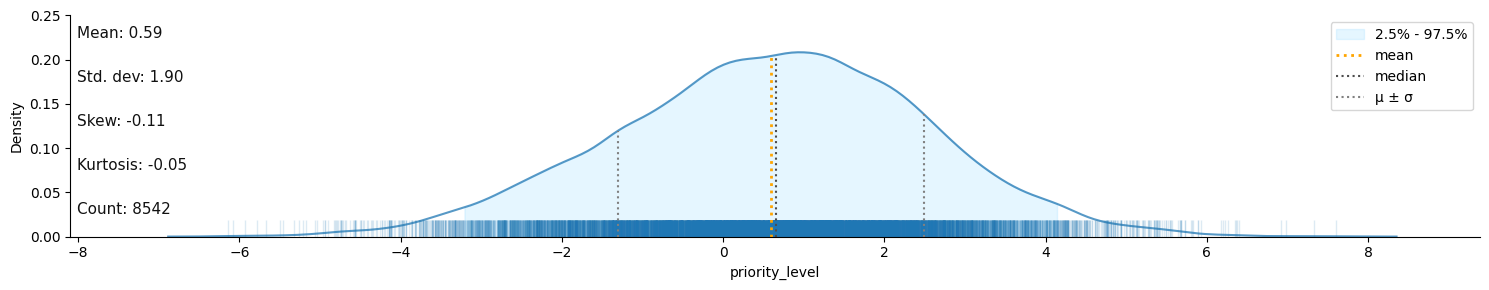

In [ ]:
klib.dist_plot(train_cleaned)

In [ ]:
train.dtypes

,0
unnamed_0,int16
task_size,float32
cpu_demand,float32
memory_demand,float32
network_latency,float32
io_operations,float32
disk_usage,float32
num_connections,float32
priority_level,float32
target,int8


In [ ]:
train.columns

Index(['unnamed_0', 'task_size', 'cpu_demand', 'memory_demand',
       'network_latency', 'io_operations', 'disk_usage', 'num_connections',
       'priority_level', 'target', 'timestamp'],
      dtype='object')

In [ ]:
train["timestamp"]  = pd.to_datetime(train["timestamp"])

In [ ]:
train["day"] = train["timestamp"].dt.day
train["month"] = train["timestamp"].dt.month
train["year"] = train["timestamp"].dt.year
train["hour"] = train["timestamp"].dt.hour

In [ ]:
train.drop(columns="timestamp", inplace=True)

In [ ]:
test["timestamp"] = pd.to_datetime(test["timestamp"])

In [ ]:
test["day"] = test["timestamp"].dt.day
test["month"] = test["timestamp"].dt.month
test["year"] = test["timestamp"].dt.year
test["hour"] = test["timestamp"].dt.hour

In [ ]:
test.drop(columns="timestamp", inplace=True)

In [ ]:
print("The DataTypes :", train.dtypes)

The DataTypes : unnamed_0            int16
task_size          float32
cpu_demand         float32
memory_demand      float32
network_latency    float32
io_operations      float32
disk_usage         float32
num_connections    float32
priority_level     float32
target                int8
day                  int32
month                int32
year                 int32
hour                 int32
dtype: object


In [ ]:
X_train = train.drop(columns="target")
Y_train = train["target"]

In [ ]:
feature_names = X_train.columns

In [ ]:
X_test = test.drop(columns="target")
Y_test = test["target"]

In [ ]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(8542, 13) (8542,) (2136, 13) (2136,)


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
# Make scorer accuracy
score_acc = make_scorer(accuracy_score)

In [ ]:

from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import RMSprop

from tensorflow.keras import Sequential # import Sequential from tensorflow.keras
from tensorflow.keras.layers import Dense # import Dense from tensorflow.keras.layers
from numpy.random import seed # seed helps you to fix the randomness in the neural network.
import tensorflow

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
from tensorflow.keras.losses import categorical_crossentropy

In [ ]:
from numpy.random import seed # seed helps you to fix the randomness in the neural network.

In [ ]:
# Import packages
# Basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pickle
from math import floor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler

# Evaluation and bayesian optimization
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.metrics import mean_squared_error as MSE
from hyperopt import hp, fmin, tpe
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from bayes_opt import BayesianOptimization

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

In [ ]:
# Make scorer: MSE
mse = make_scorer(MSE, greater_is_better=False)

In [ ]:
Y_train.value_counts()

,count
target,
1,4295
0,4247


### The above dataset is a balanced dataset

### <b> *FEATURE* *IMPORTANCE* </b>

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
# Train Extra Trees Classifier
model = ExtraTreesClassifier(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

ExtraTreesClassifier(random_state=42)

In [ ]:
train.columns

Index(['unnamed_0', 'task_size', 'cpu_demand', 'memory_demand',
       'network_latency', 'io_operations', 'disk_usage', 'num_connections',
       'priority_level', 'target', 'day', 'month', 'year', 'hour'],
      dtype='object')

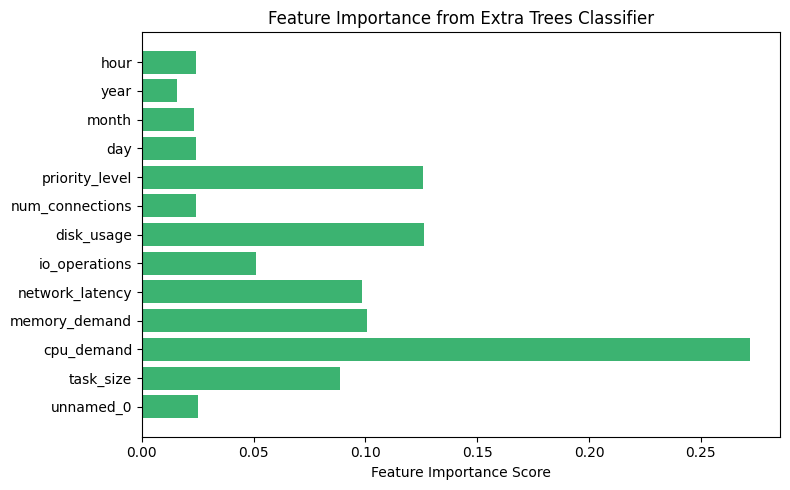

In [ ]:
importances = model.feature_importances_

# Plot feature importances
plt.figure(figsize=(8, 5))
plt.barh(feature_names, importances, color='mediumseagreen')
plt.xlabel('Feature Importance Score')
plt.title('Feature Importance from Extra Trees Classifier')
plt.tight_layout()
plt.show()

In [ ]:
# Make scorer: MSE
mse = make_scorer(MSE, greater_is_better=False)

In [ ]:
Y_train.value_counts()

,count
target,
1,4295
0,4247


In [ ]:
X_train.shape

(8542, 13)

In [ ]:
from sklearn.metrics import accuracy_score as accuracy
accuracy = make_scorer(accuracy, greater_is_better=False)

In [ ]:
import time

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
def gbm_cl_bo(max_depth, max_features, learning_rate, n_estimators, subsample):
    params_gbm = {}
    params_gbm['max_depth'] = round(max_depth)
    params_gbm['max_features'] = max_features
    params_gbm['learning_rate'] = learning_rate
    params_gbm['n_estimators'] = round(n_estimators)
    params_gbm['subsample'] = subsample
    scores = cross_val_score(GradientBoostingClassifier(random_state=123, **params_gbm),
                             X_train, Y_train, scoring=accuracy, cv=5).mean()
    score = scores.mean()
    return score
# Run Bayesian Optimization
start = time.time()
params_gbm ={
    'max_depth':(3, 10),
    'max_features':(0.8, 1),
    'learning_rate':(0.01, 1),
    'n_estimators':(80, 150),
    'subsample': (0.8, 1)
}

In [ ]:
gbm_bo = BayesianOptimization(gbm_cl_bo, params_gbm, random_state=111)
gbm_bo.maximize(init_points=10, n_iter=4)
print('It takes %s minutes' % ((time.time() - start)/60))

|   iter    |  target   | learni... | max_depth | max_fe... | n_esti... | subsample |
-------------------------------------------------------------------------------------
| 1         | -0.9301   | 0.616     | 4.183     | 0.8872    | 133.8     | 0.8591    |
| 2         | -0.9315   | 0.1577    | 3.157     | 0.884     | 96.71     | 0.8675    |
| 3         | -0.9225   | 0.9908    | 4.664     | 0.8162    | 126.9     | 0.9242    |
| 4         | -0.9424   | 0.2815    | 6.264     | 0.8237    | 85.18     | 0.9802    |
| 5         | -0.9451   | 0.796     | 8.884     | 0.963     | 149.4     | 0.9155    |
| 6         | -0.9195   | 0.8156    | 5.949     | 0.8055    | 111.8     | 0.8211    |
| 7         | -0.9437   | 0.819     | 7.884     | 0.9131    | 99.2      | 0.9997    |
| 8         | -0.947    | 0.1467    | 7.308     | 0.897     | 108.4     | 0.9456    |
| 9         | -0.9439   | 0.3296    | 5.804     | 0.8638    | 146.3     | 0.9837    |
| 10        | -0.9184   | 0.8157    | 3.239     | 0.98

In [ ]:
params_gbm = gbm_bo.max['params']
params_gbm['max_depth'] = round(params_gbm['max_depth'])
params_gbm['n_estimators'] = round(params_gbm['n_estimators'])
params_gbm

{'learning_rate': 0.9770686084241488,
 'max_depth': 5,
 'max_features': 0.9071840538719766,
 'n_estimators': 127,
 'subsample': 0.9214345438923253}

In [ ]:
gbc_hyp =  GradientBoostingClassifier(**params_gbm, random_state=123)

In [ ]:
gbc_hyp.fit(X_train, Y_train)


GradientBoostingClassifier(learning_rate=0.9770686084241488, max_depth=5,
                           max_features=0.9071840538719766, n_estimators=127,
                           random_state=123, subsample=0.9214345438923253)

In [ ]:
pred_gbc = gbc_hyp.predict(X_test)

In [ ]:
pred_gbc = pd.DataFrame(pred_gbc)

In [ ]:
pred_gbc.rename(columns = {0:"Label"}, inplace=True)

In [ ]:
pred_gbc.value_counts()

,count
Label,
0,1073
1,1063


In [ ]:
from sklearn.metrics import accuracy_score as acc_score

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(acc_score(pred_gbc,Y_test))

0.9349250936329588


In [ ]:
print(classification_report(pred_gbc,Y_test))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1073
           1       0.94      0.93      0.93      1063

    accuracy                           0.93      2136
   macro avg       0.93      0.93      0.93      2136
weighted avg       0.93      0.93      0.93      2136



### KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Hyperparameter-tuning: Bayesian Optimization, bayes_opt
def knn_cl_bo(n_neighbors, weights, p):
    params_knn = {}
    weightsL = ['uniform', 'distance']

    params_knn['n_neighbors'] = round(n_neighbors)
    params_knn['weights'] = weightsL[round(weights)]
    params_knn['p'] = round(p)

    score = cross_val_score(KNeighborsClassifier(**params_knn),
                             X_train, Y_train, cv=9, scoring=accuracy).mean()
    return score

In [ ]:
# Set hyperparameters spaces
params_knn ={
    'n_neighbors':(3, 20),
    'weights':(0, 1),
    'p':(1, 2)}

# Run Bayesian Optimization
knn_bo = BayesianOptimization(knn_cl_bo, params_knn, random_state=111)
knn_bo.maximize(init_points=4, n_iter=35)

|   iter    |  target   | n_neig... |     p     |  weights  |
-------------------------------------------------------------
| 1         | -0.9218   | 13.41     | 1.169     | 0.4361    |
| 2         | -0.9233   | 16.08     | 1.295     | 0.1492    |
| 3         | -0.9128   | 3.382     | 1.42      | 0.2387    |
| 4         | -0.9171   | 8.74      | 1.991     | 0.2377    |
| 5         | -0.9117   | 3.058     | 1.924     | 0.9388    |
| 6         | -0.9127   | 3.094     | 1.319     | 0.9974    |
| 7         | -0.9121   | 4.42      | 1.95      | 0.995     |
| 8         | -0.9117   | 3.277     | 1.975     | 0.9996    |
| 9         | -0.9118   | 3.011     | 1.958     | 0.1042    |
| 10        | -0.9117   | 3.01      | 1.983     | 0.7309    |
| 11        | -0.9141   | 5.384     | 1.982     | 0.007727  |
| 12        | -0.9195   | 19.97     | 1.961     | 0.9447    |
| 13        | -0.9219   | 5.516     | 1.041     | 0.98      |
| 14        | -0.9121   | 4.168     | 1.996     | 0.04597   |
| 15    

In [ ]:
# Best hyperparameters
params_knn = knn_bo.max['params']
weightsL = ['uniform', 'distance']
params_knn['n_neighbors'] = round(params_knn['n_neighbors'])
params_knn['weights'] = weightsL[round(params_knn['weights'])]
params_knn['p'] = round(params_knn['p'])
params_knn

{'n_neighbors': 3, 'p': 2, 'weights': 'distance'}

In [ ]:
# Fit the training data
knn_hyp = KNeighborsClassifier(**params_knn)
knn_hyp.fit(X_train, Y_train)

# Predict the validation data
pred_knn = knn_hyp.predict(X_test)

# Compute the accuracy
print('Accuracy: ' + str(accuracy_score(Y_test, pred_knn)))

Accuracy: 0.9115168539325843


In [ ]:
pred_knn = pd.DataFrame(pred_knn)

In [ ]:
pred_knn.rename(columns = {0 : "Predict"}, inplace=True)

In [ ]:
pred_knn.shape

(2136, 1)

In [ ]:
pred_knn.value_counts()

,count
Predict,
1,1097
0,1039
